In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
#This function returns vertices in a sudoku for the leftmost vertex position (position) and sudoku dimension (n).
#Input int position, int n
def vertices_in_grid(position, n):
    #Determine square width and height based on sudoku dimension n
    rootn = sqrt(n)
    #Create a list containing all vertices in the grid based on given function input and return it
    grid_vertices = []
    for i in range(0,rootn):
        for j in range(0,rootn):
            grid_vertices.append (n*i + j + position)
    
    return grid_vertices

# This function returns all in vertex edges that are not in the same row or column based on the vertices in a grid and sudoku dimension n
#Input list vertices, int n
#Returns list grid_edges
def edges_in_grid(vertices,n):
    rootn = sqrt(n)
    grid_edges = []
    for i in range(0,n):
        for j in range(i+1,n):
            if ((int(vertices[i]) % rootn) != (int(vertices[j]) % rootn)) and ((vertices[j] - vertices[i]) > rootn):
                grid_edges.append([vertices[i], vertices[j]])
    return grid_edges

In [5]:
#Create an empty graph and color map.
G = nx.Graph()
color_map = []
for i in range(0,81):
    G.add_node(i)
    color_map.append(i)

n= 9
#Add all row edges to the graph
for k in range(0,n):
    for i in range(0,n):
        for j in range(0,n):
            if i < j:
                G.add_edge(i + n*k,j + n*k)
                
#Add all column edges to the graph
for k in range(0,n):
    for i in range(0,n):
        for j in range(0,n):
            if i < j:
                G.add_edge(n*i + k, n*j + k)

rootn = sqrt(n)
#Add all grid edges to the graph
for j in range(0,rootn):
    for i in range(0,rootn):
        position = 27*j + 3*i
        #Create list of all vertices in grid for each unique starting position in grid:
        gridVertices = vertices_in_grid(position, n)
        #Create list of all dges in grid corresponding to previous starting position
        gridEdges = edges_in_grid(gridVertices, n)
        for gEdge in gridEdges:
            G.add_edge(gEdge[0], gEdge[1])
        #Make a list of all vertices corresponding to grid of position.



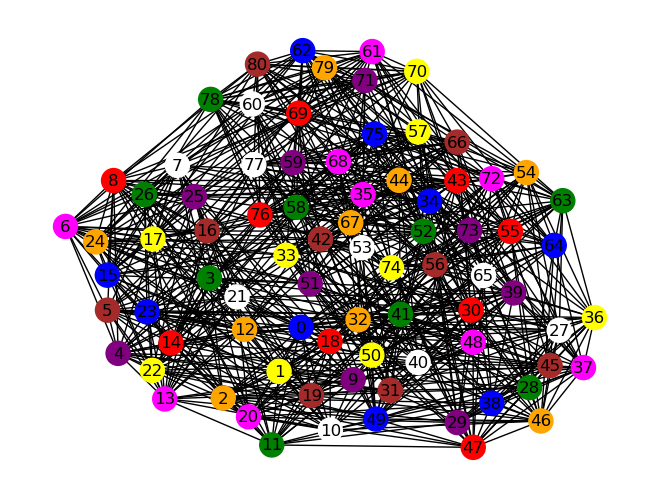

In [6]:
#Define the color dictionary and key map
color_dict = {'1': 'Red', '2' : 'Green', '3': 'Yellow', '4': 'Blue', '5' : 'Orange', '6' : 'Purple', '7' : 'Magenta', '8' : 'White', '9' : 'Brown' }

color_key_map = [4,3,5,2,6,9,7,8,1,   6,8,2,5,7,1,4,9,3,   1,9,7,8,3,4,5,6,2,  8,2,6,1,9,5,3,4,7,  3,7,4,6,8,2,9,1,5, 9,5,1,7,4,3,6,2,8,  5,1,9,3,2,6,8,7,4,  2,4,8,9,5,7,1,3,6,  7,6,3,4,1,8,2,5,9]

#Color the graph and draw it based on the color map.
for i in range(0,81):
    color_map[i] = color_dict[str(color_key_map[i])]
nx.draw(G, node_color = color_map, with_labels = true)